# ِDataset MetaData

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import random

# Read Dataset

In [2]:
df = pd.read_csv('marketing_AB.csv')
df

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


# Explore Dataset

In [3]:
df.shape

(588101, 7)

In [4]:
df.head(5)

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [5]:
df.tail(5)

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23
588100,588100,1237779,ad,False,1,Tuesday,23


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [7]:
df.describe(include="all")

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
count,588101.000000,5.881010e+05,588101,588101,588101.000000,588101,588101.000000
unique,NaN,NaN,2,2,NaN,7,NaN
top,NaN,NaN,ad,False,NaN,Friday,NaN
freq,NaN,NaN,564577,573258,NaN,92608,NaN
mean,294050.000000,1.310692e+06,NaN,NaN,24.820876,NaN,14.469061
std,169770.279667,2.022260e+05,NaN,NaN,43.715181,NaN,4.834634
min,0.000000,9.000000e+05,NaN,NaN,1.000000,NaN,0.000000
25%,147025.000000,1.143190e+06,NaN,NaN,4.000000,NaN,11.000000
50%,294050.000000,1.313725e+06,NaN,NaN,13.000000,NaN,14.000000
75%,441075.000000,1.484088e+06,NaN,NaN,27.000000,NaN,18.000000


In [8]:
df.columns

Index(['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads',
       'most ads day', 'most ads hour'],
      dtype='object')

# Data cleansing

In [9]:
if "Unnamed: 0" in df.columns:
   
    df = df.drop(["Unnamed: 0"], axis =1)

In [10]:
df.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)
df.head(1)

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1069124,ad,False,130,Monday,20


In [11]:
#duplicate rows?
dups = df.duplicated()
print(dups.any())

False


In [12]:
#duplicated user_id?
df[df["user_id"].duplicated()].count()

user_id          0
test_group       0
converted        0
total_ads        0
most_ads_day     0
most_ads_hour    0
dtype: int64

In [13]:
print(f'Rows            : {df.shape[0]}')
print(f'Columns         : {df.shape[1]}')
print(f'Features        : {df.columns.tolist()}')
print(f'Missing Values  : {df.isnull().values.sum()}')
print(f'Unique Values   : \n\n{df.nunique()}')

Rows            : 588101
Columns         : 6
Features        : ['user_id', 'test_group', 'converted', 'total_ads', 'most_ads_day', 'most_ads_hour']
Missing Values  : 0
Unique Values   : 

user_id          588101
test_group            2
converted             2
total_ads           807
most_ads_day          7
most_ads_hour        24
dtype: int64


In [14]:
df.isnull().any()

user_id          False
test_group       False
converted        False
total_ads        False
most_ads_day     False
most_ads_hour    False
dtype: bool

In [15]:
df["converted_int"] = df['converted'].apply(lambda x:1 if x== True  else  0)
df["converted_int"].sum()

14843

In [16]:
df.head(10)

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour,converted_int
0,1069124,ad,False,130,Monday,20,0
1,1119715,ad,False,93,Tuesday,22,0
2,1144181,ad,False,21,Tuesday,18,0
3,1435133,ad,False,355,Tuesday,10,0
4,1015700,ad,False,276,Friday,14,0
5,1137664,ad,False,734,Saturday,10,0
6,1116205,ad,False,264,Wednesday,13,0
7,1496843,ad,False,17,Sunday,18,0
8,1448851,ad,False,21,Tuesday,19,0
9,1446284,ad,False,142,Monday,14,0


# Analysis

In [17]:
def val_count(column):
    plt.figure(figsize=(5,3))
    sns.countplot(data=df, x=column)
    plt.title(f'Value Count - {column}')
    plt.show()

    #print(df[column].value_counts())

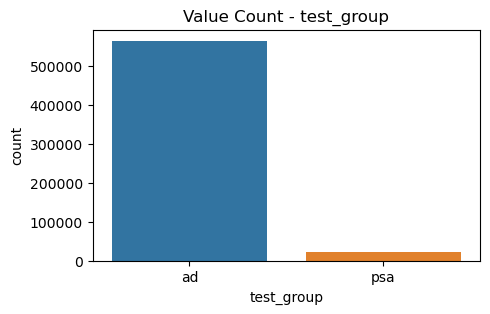

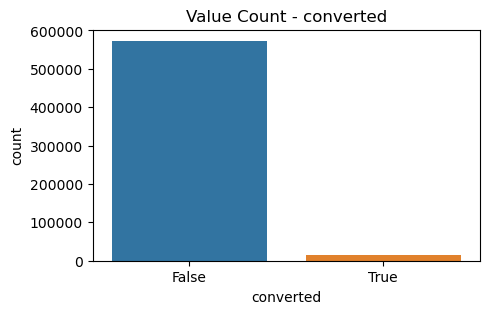

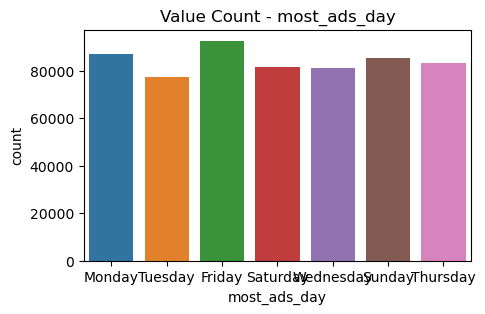

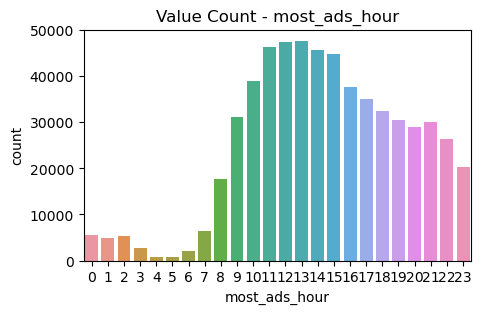

In [18]:
#create columns of interest
col_lst = df.columns[[1,2,4,5]]

#loop through columns of interest
for i in col_lst:
    val_count(i)

the majority of users saw the ads compared to those saw the psa

the most ads seen by a user occurred on Friday and then Monday

between 10AM and 3PM, users saw the most ads

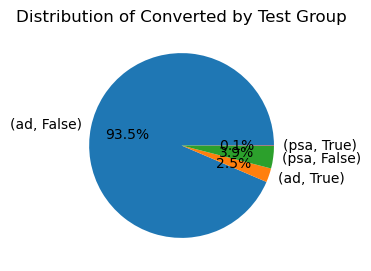

In [19]:
grouped_counts = df.groupby('test_group')['converted'].value_counts()
grouped_counts

# Plot the data as a pie chart
grouped_counts.plot.pie(figsize= (3,3),autopct='%1.1f%%')

# Set the title and axis labels
plt.title('Distribution of Converted by Test Group')
plt.ylabel('')

# Show the plot
plt.show()


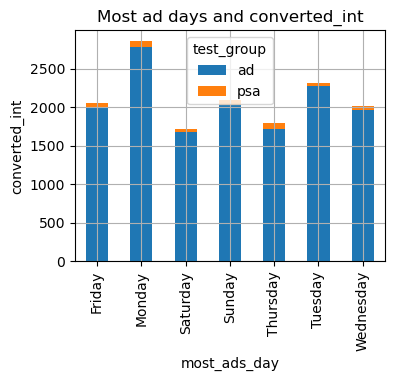

In [20]:
ax =df.groupby(by =['most_ads_day', 'test_group']).sum()['converted_int'].unstack('test_group').plot(kind= 'bar', figsize= (4,3), grid= True, stacked= True)
ax.set_ylabel('converted_int')
ax.set_title('Most ad days and converted_int')
plt.show()

# AB test

### Minimum Sample Size

In [21]:
import math

def sample_size_calculator(population_size, confidence_level, margin_of_error):
    z_score = {
        0.90: 1.645,
        0.95: 1.96,
        0.99: 2.576
    }
    
    z = z_score[confidence_level]
    p = 0.5 # assuming 50% for a conservative estimate of the sample size
    q = 1 - p
    
    sample_size = ((z**2) * p * q * population_size) / ((z**2 * q) + ((margin_of_error**2) * (population_size - 1)))
    return math.ceil(sample_size)

In [22]:
#compute sample size 
pop_size = df.shape[0]
conf_level = 0.99
margin_err = 0.03

sample_size = sample_size_calculator(pop_size, conf_level, margin_err)
print(f"The population size is :{pop_size} \nThe required sample size is: {sample_size}")

The population size is :588101 
The required sample size is: 1832


In [23]:
df

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour,converted_int
0,1069124,ad,False,130,Monday,20,0
1,1119715,ad,False,93,Tuesday,22,0
2,1144181,ad,False,21,Tuesday,18,0
3,1435133,ad,False,355,Tuesday,10,0
4,1015700,ad,False,276,Friday,14,0
...,...,...,...,...,...,...,...
588096,1278437,ad,False,1,Tuesday,23,0
588097,1327975,ad,False,1,Tuesday,23,0
588098,1038442,ad,False,3,Tuesday,23,0
588099,1496395,ad,False,1,Tuesday,23,0


In [24]:
control = df.query('test_group == "ad"')
treamtment = df.query('test_group == "psa"')


(array([  1.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   2.,   6.,  12.,
         20.,  22.,  45.,  66.,  91., 119., 167., 159., 251., 300., 409.,
        477., 564., 454., 632., 679., 611., 661., 604., 575., 399., 512.,
        450., 404., 296., 253., 154., 171., 127.,  91.,  79.,  46.,  23.,
         23.,  20.,  11.,   9.,   2.,   1.]),
 array([0.02065975, 0.02082299, 0.02098623, 0.02114946, 0.0213127 ,
        0.02147594, 0.02163918, 0.02180241, 0.02196565, 0.02212889,
        0.02229213, 0.02245536, 0.0226186 , 0.02278184, 0.02294508,
        0.02310831, 0.02327155, 0.02343479, 0.02359803, 0.02376127,
        0.0239245 , 0.02408774, 0.02425098, 0.02441422, 0.02457745,
        0.02474069, 0.02490393, 0.02506717, 0.0252304 , 0.02539364,
        0.02555688, 0.02572012, 0.02588335, 0.02604659, 0.02620983,
        0.02637307, 0.0265363 , 0.02669954, 0.02686278, 0.02702602,
        0.02718925, 0.02735249, 0.02751573, 0.02767897, 0.0278422 ,
        0.02800544, 0.02816868, 0.02833192, 0.

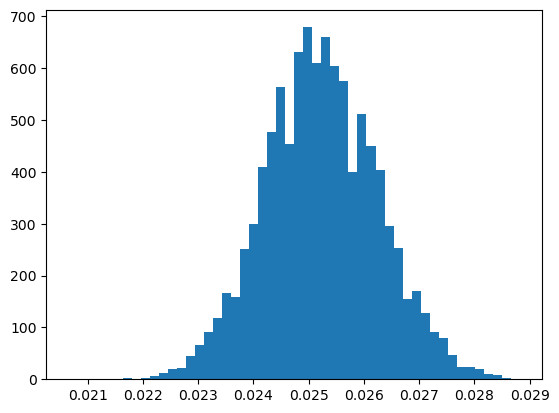

In [25]:
ad_converted = np.random.binomial(len(treamtment),
                                  df.converted.mean(), 10000) / len(treamtment)

plt.hist(ad_converted, bins=50)

(array([  1.,   1.,   0.,   3.,   5.,  12.,  15.,  16.,  25.,  32.,  35.,
         76.,  97., 116., 154., 218., 234., 334., 339., 457., 473., 539.,
        519., 609., 615., 573., 596., 555., 534., 537., 391., 375., 315.,
        271., 224., 194., 148., 108.,  69.,  51.,  39.,  29.,  24.,  15.,
         12.,   2.,   5.,   4.,   1.,   3.]),
 array([0.02444308, 0.02447457, 0.02450606, 0.02453756, 0.02456905,
        0.02460054, 0.02463203, 0.02466353, 0.02469502, 0.02472651,
        0.024758  , 0.0247895 , 0.02482099, 0.02485248, 0.02488398,
        0.02491547, 0.02494696, 0.02497845, 0.02500995, 0.02504144,
        0.02507293, 0.02510442, 0.02513592, 0.02516741, 0.0251989 ,
        0.02523039, 0.02526189, 0.02529338, 0.02532487, 0.02535636,
        0.02538786, 0.02541935, 0.02545084, 0.02548233, 0.02551383,
        0.02554532, 0.02557681, 0.0256083 , 0.0256398 , 0.02567129,
        0.02570278, 0.02573428, 0.02576577, 0.02579726, 0.02582875,
        0.02586025, 0.02589174, 0.02592323, 0.

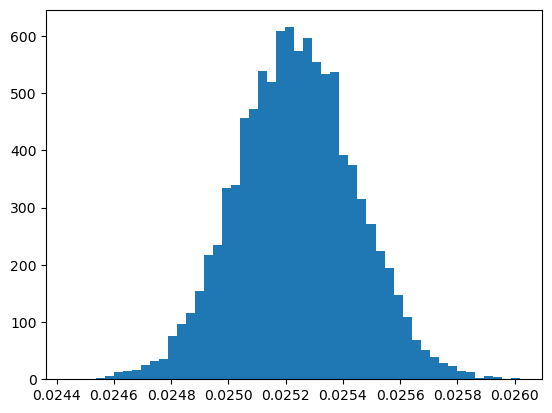

In [26]:
psa_converted = np.random.binomial(len(control),
                                   df.converted.mean(), 10000) / len(control)

plt.hist(psa_converted, bins=50 ,align = 'mid' , data=None)

In [27]:
p_diffs = ad_converted - psa_converted
p_diffs
p_diffs.mean()

-1.0122929950895779e-05

In [28]:
#real diff
# customer who is shown ads bought less
ab_data_diff = treamtment['converted'].mean() - control['converted'].mean()
ab_data_diff

-0.007692453192201517

<div style = "direction: rtl;" >
آیا  کسانی که به آنها تبلیغ نشان داده شده کمتر خرید کردند آیا این موضوع از لحاظ آماری معنا دار است یا خیر؟
    </br>
فرضیه صفر :نمایش تبلیغ  تأثیر معنادار بر تعداد خرید ندارد
</br>
فرضیه جایگزین:نمایش تبلیغ تأثیر معنادار بر تعداد خرید دارد
</div>    

In [29]:
# is buying less is 
if ab_data_diff > 0 : 
    p_value = (p_diffs > ab_data_diff).mean() * 100
else :
    p_value = (p_diffs <= ab_data_diff).mean() * 100
print ( "p_value = " ,p_value)
if p_value < 0.05:
    print( 'Reject the null hypothesis. There is a significant difference between the two groups.')
else:
    print( 'Fail to reject the null hypothesis. There is no significant difference between the two groups.')


p_value =  0.0
Reject the null hypothesis. There is a significant difference between the two groups.


<div style = "direction: rtl;" >
نمایش تبلیغ باعث تعداد خرید کمتر شده است
</div>

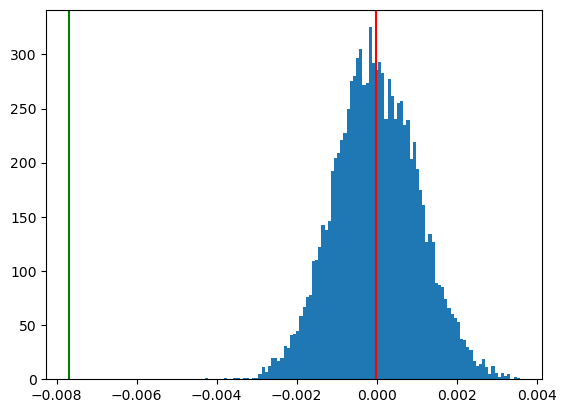

In [30]:
plt.hist(p_diffs, bins=100)
low = ab_data_diff
higth = p_diffs.mean()
plt.axvline(x=low, color='g')
plt.axvline(x=higth, color='r')

# AB test using Code Simulation

In [31]:
control = df.query('test_group == "ad"')
treamtment = df.query('test_group == "psa"')


In [32]:
dif = treamtment["converted"].mean() - control["converted"].mean()
dif

-0.007692453192201517

In [33]:
conversion = np.array([
    np.append(np.zeros(len(control["converted"])), np.ones(len(treamtment["converted"]))),
    np.append(control["converted"],treamtment["converted"])
])
conversion_t = conversion.T
conversion_t

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [34]:

def sh_exp(N):
    experiment_diff_mean = np.empty([N, 1])
    for times in np.arange(N):
        experiment_label = np.random.randint(0, 2, len(conversion_t))
        experiment_data = np.array([
            experiment_label,
            conversion_t[:, 1]
        ]).T
        experiment_diff_mean[times] = experiment_data[experiment_data[:, 0] == 1][:, 1].mean() - experiment_data[experiment_data[:, 0] == 0][:, 1].mean()
    return experiment_diff_mean


In [35]:
n=2000
p_difs = sh_exp(n)

if dif > 0  : 
    p_value = len(p_difs[p_difs >= dif]) / n * 100
else : 
    p_value = len(p_difs[p_difs <= dif]) / n * 100
    
if p_value < 0.05:
    print( 'Reject the null hypothesis. There is a significant difference between the two groups.')
else:
    print( 'Fail to reject the null hypothesis. There is no significant difference between the two groups.')


    

Reject the null hypothesis. There is a significant difference between the two groups.


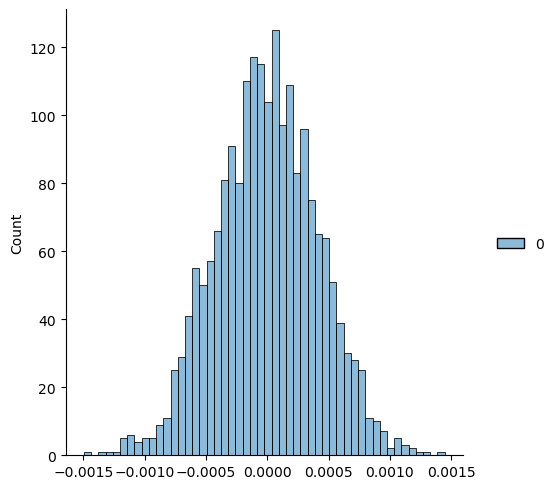

In [37]:
sns.displot(p_difs, bins=50)

# T-test 

In [46]:


df_ads_day = pd.DataFrame(df.groupby(by=['most_ads_day', 'test_group'])['total_ads'].sum())
df_ads_day['avg_ads_hour'] = df.groupby(by=['most_ads_day', 'test_group'])['most_ads_hour'].mean()

# Calculate the number of conversions
df_ads_day['converted'] = df[df['converted'] == True].groupby(by=['most_ads_day', 'test_group'])['converted'].count()
df_ads_day['conv_rate'] = df.groupby(by=['most_ads_day', 'test_group'])['converted'].mean()


df_ads_day.reset_index(inplace=True)  # Reset the index to have separate columns for 'most_ads_day' and 'test_group'

df_ads_day


,most_ads_day,test_group,total_ads,avg_ads_hour,converted,conv_rate
0,Friday,ad,2369546,14.717493,1995,0.022465
1,Friday,psa,94950,14.156455,62,0.016303
2,Monday,ad,2121848,14.620754,2778,0.033241
3,Monday,psa,83582,14.308110,79,0.022559
4,Saturday,ad,1980043,14.714017,1679,0.021307
5,Saturday,psa,80048,14.312456,40,0.013996
6,Sunday,ad,2006360,14.381954,2027,0.024620
7,Sunday,psa,77493,14.444590,63,0.020595
8,Thursday,ad,1839933,14.524539,1711,0.021637
9,Thursday,psa,104240,14.237388,79,0.020230


<Axes: >

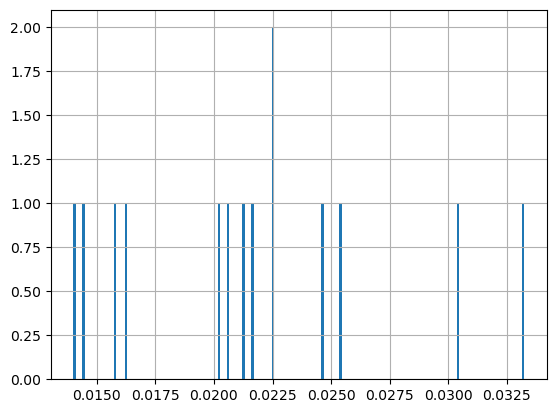

In [45]:
df_ads_day["conv_rate"].hist(bins=200)

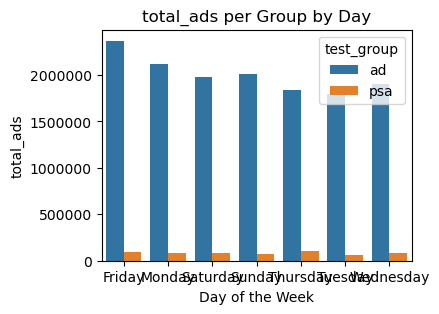

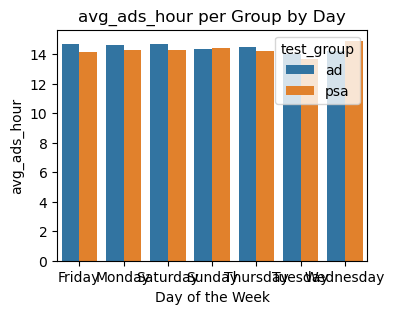

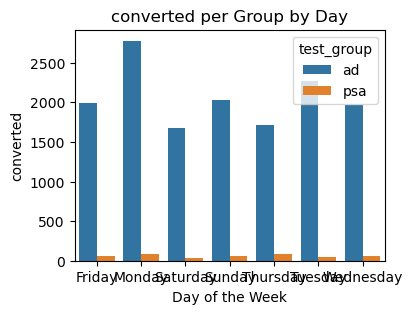

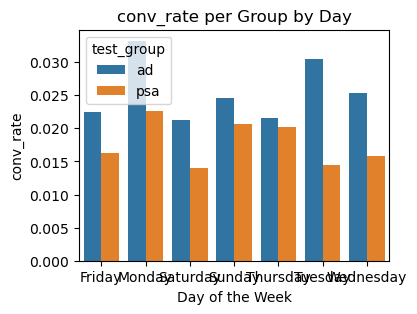

In [42]:
#visualize day data
def day_visualize(column):
    plt.figure(figsize=(4,3))
    sns.barplot(data=df_ads_day.reset_index(), x='most_ads_day', y=column, hue='test_group')
    plt.xlabel('Day of the Week')
    plt.ticklabel_format(axis='y', style='plain')
    plt.title(f'{column} per Group by Day')
    plt.show()

for column in df_ads_day.columns:
    if column != 'most_ads_day' and column != 'test_group':
        day_visualize(column)

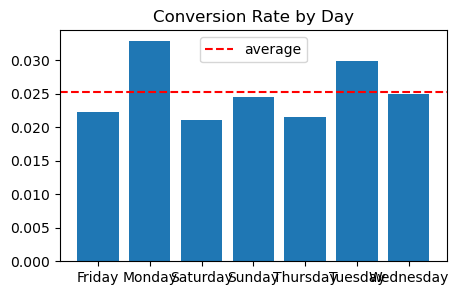

In [233]:
#visualize conversion by day
df_day_conv = pd.DataFrame(df.groupby('most_ads_day')['converted'].mean())
df_day_conv.reset_index(inplace=True)

plt.figure(figsize=(5,3))
plt.bar(data=df_day_conv, x='most_ads_day', height='converted')
plt.title('Conversion Rate by Day')
plt.axhline(df['converted'].mean(), color='r', linestyle='--', label='average')
plt.legend()
plt.show()

In [211]:
ad_df = df_ads_day["converted"][df_ads_day.test_group == 'ad'].reset_index(drop=True)
psa_df = df_ads_day["converted"][df_ads_day.test_group == 'psa'].reset_index(drop=True)

ad_df , psa_df

(0    1995
 1    2778
 2    1679
 3    2027
 4    1711
 5    2270
 6    1963
 Name: converted, dtype: int64,
 0    62
 1    79
 2    40
 3    63
 4    79
 5    42
 6    55
 Name: converted, dtype: int64)

In [212]:
d = psa_df.mean()-ad_df.mean()
psa_df.mean() ,ad_df.mean() , d

(60.0, 2060.4285714285716, -2000.4285714285716)

In [213]:
sales = np.array([
    np.append(np.zeros(len(ad_df)), np.ones(len(psa_df))),
    np.append(ad_df, psa_df)
])
sales

array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00],
       [1.995e+03, 2.778e+03, 1.679e+03, 2.027e+03, 1.711e+03, 2.270e+03,
        1.963e+03, 6.200e+01, 7.900e+01, 4.000e+01, 6.300e+01, 7.900e+01,
        4.200e+01, 5.500e+01]])

In [214]:
sales_t = sales.T
sales_t

array([[0.000e+00, 1.995e+03],
       [0.000e+00, 2.778e+03],
       [0.000e+00, 1.679e+03],
       [0.000e+00, 2.027e+03],
       [0.000e+00, 1.711e+03],
       [0.000e+00, 2.270e+03],
       [0.000e+00, 1.963e+03],
       [1.000e+00, 6.200e+01],
       [1.000e+00, 7.900e+01],
       [1.000e+00, 4.000e+01],
       [1.000e+00, 6.300e+01],
       [1.000e+00, 7.900e+01],
       [1.000e+00, 4.200e+01],
       [1.000e+00, 5.500e+01]])

In [215]:

def sh_exp(N):
    experiment_diff_mean = np.empty([N, 1])
    for times in np.arange(N):
        experiment_label = np.random.randint(0, 2, len(sales_t))
        experiment_data = np.array([
            experiment_label,
            sales_t[:, 1]
        ]).T
        experiment_diff_mean[times] = experiment_data[experiment_data[:, 0] == 1][:, 1].mean() - experiment_data[experiment_data[:, 0] == 0][:, 1].mean()
    return experiment_diff_mean

In [216]:
e1 = sh_exp(sample_size)
e1

C:\Users\user\AppData\Local\Temp\ipykernel_15620\2607062591.py:9: RuntimeWarning: Mean of empty slice.
  experiment_diff_mean[times] = experiment_data[experiment_data[:, 0] == 1][:, 1].mean() - experiment_data[experiment_data[:, 0] == 0][:, 1].mean()
C:\Users\user\anaconda3\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


array([[ -389.8       ],
       [-1273.79166667],
       [  353.44444444],
       ...,
       [-1861.625     ],
       [  167.33333333],
       [-1208.58333333]])

In [217]:
p_value = len(e1[e1 >= abs(d)]) / sample_size * 100
print(p_value)
if p_value < 0.05:
    print ( 'Reject the null hypothesis. There is a significant difference between the two groups.')
else:
    print ('Fail to reject the null hypothesis. There is no significant difference between the two groups.')

  

0.006367804381049414
Reject the null hypothesis. There is a significant difference between the two groups.


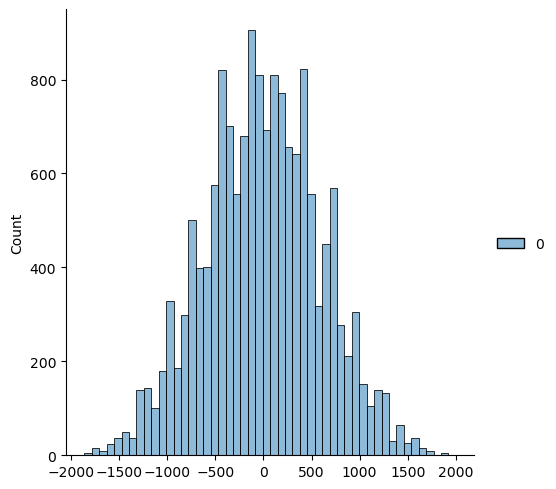

In [218]:
sns.displot(e1, bins=50)

# Chi2 Test

In [19]:
df.head()

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour,converted_int
0,1069124,ad,False,130,Monday,20,0
1,1119715,ad,False,93,Tuesday,22,0
2,1144181,ad,False,21,Tuesday,18,0
3,1435133,ad,False,355,Tuesday,10,0
4,1015700,ad,False,276,Friday,14,0


In [20]:
ct = pd.crosstab(df['test_group'], df['converted'], margins=True)

ct

converted,False,True,All
test_group,,,
ad,550154,14423,564577
psa,23104,420,23524
All,573258,14843,588101


In [28]:
d = np.append(ct.iloc[0][: -1].values, ct.iloc[1][: -1].values)
type(d)
d

array([550154,  14423,  23104,    420], dtype=int64)

In [35]:
chi2, p_value, dof, expected  =stats.chi2_contingency(d)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

Chi-square statistic: 0.0
P-value: 1.0
Degrees of freedom: 0
Expected frequencies:
[5.50154e+05 1.44230e+04 2.31040e+04 4.20000e+02]


In [36]:
if p_value < 0.05:
    print ( 'Reject the null hypothesis. There is a significant difference between the two groups.')
else:
    print ('Fail to reject the null hypothesis. There is no significant difference between the two groups.')

  

Fail to reject the null hypothesis. There is no significant difference between the two groups.


In [ ]:
# Simin Alavizadeh